In [1]:
import tensorflow as tf
import pandas as pd

In [30]:
class Environment:
    DF_PATH = 'AAPL.csv'
    INITIAL_MONEY = 10000
    INITIAL_STOCKS = []
    OBSERVATION_SPACE = 6
    ACTION_SPACE = 3
    
    
    def __init__(self):
        self.df = pd.read_csv(self.DF_PATH)[:200]
        if 'Date' in self.df:
            self.df.pop('Date')
        self.data = self.df.values
        self.current_money = self.INITIAL_MONEY
        self.current_stocks = self.INITIAL_STOCKS.copy()
        self.cursor = 0
        
    def reset(self):
        self.cursor = 0
        
    def sell(self):
        if len(self.current_stocks) > 0:
            bought = self.current_stocks.pop(0)
            sold = self.data[self.cursor][2]
            profit = sold - bought
        else:
            profit = -100
        return profit
    
    def hold(self):
        return -1
    
    def buy(self):
        if self.current_money >= self.data[self.cursor][1]:
            self.current_money -= self.data[self.cursor][1]
            self.current_stocks.append(self.data[self.cursor][1])
            self.current_stocks.sort()
            return 1
        return -100
            
    def reward(self, profit):
        return profit + self.current_money / self.INITIAL_MONEY - self.cursor/len(self.data)
    
    def get_state(self):
        state = self.data[self.cursor]
        return state
        
    def step(self, action):
        action -= 1
        done = False
        self.cursor += 1
        
        while np.isnan(self.get_state()).any():
            self.cursor += 1
            print("JUST ESCAPED NAN")
        
        if action == -1:
            profit = self.sell()
        elif action == 0:
            profit = self.hold()
        elif action == 1:
            profit = self.buy()
            
        if self.cursor == len(self.data) - 1:
            done = True
            
        return self.get_state(), self.reward(profit), done

In [12]:
df = pd.read_csv('AAPL.csv')[:2000]
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0
...,...,...,...,...,...,...,...
1995,1988-11-02,1.366071,1.366071,1.312500,1.330357,1.068099,52130400.0
1996,1988-11-03,1.330357,1.339286,1.312500,1.325893,1.064514,60614400.0
1997,1988-11-04,1.312500,1.357143,1.312500,1.348214,1.082435,38449600.0
1998,1988-11-07,1.330357,1.348214,1.321429,1.339286,1.075267,42520800.0


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_107 (Dense)            (None, 3)                 75        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 25        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
 1[1. 0. 0.]
 2[1. 0. 0.]
 3[1. 0.

 85[1. 0. 0.]
 86[1. 0. 0.]
 87[1. 0. 0.]
 88[1. 0. 0.]
 89[1. 0. 0.]
 90[1. 0. 0.]
 91[1. 0. 0.]
 92[1. 0. 0.]
 93[1. 0. 0.]
 94[1. 0. 0.]
 95[1. 0. 0.]
 96[1. 0. 0.]
 97[1. 0. 0.]
 98[1. 0. 0.]
 99[1. 0. 0.]
 100[1. 0. 0.]
 101[1. 0. 0.]
 102[1. 0. 0.]
 103[1. 0. 0.]
 104[1. 0. 0.]
 105[1. 0. 0.]
 106[1. 0. 0.]
 107[1. 0. 0.]
 108[1. 0. 0.]
 109[1. 0. 0.]
 110[1. 0. 0.]
 111[1. 0. 0.]
 112[1. 0. 0.]
 113[1. 0. 0.]
 114[1. 0. 0.]
 115[1. 0. 0.]
 116[1. 0. 0.]
 117[1. 0. 0.]
 118[1. 0. 0.]
 119[1. 0. 0.]
 120[1. 0. 0.]
 121[1. 0. 0.]
 122[1. 0. 0.]
 123[1. 0. 0.]
 124[1. 0. 0.]
 125[1. 0. 0.]
 126[1. 0. 0.]
 127[1. 0. 0.]
 128[1. 0. 0.]
 129[1. 0. 0.]
 130[1. 0. 0.]
 131[1. 0. 0.]
 132[1. 0. 0.]
 133[1. 0. 0.]
 134[1. 0. 0.]
 135[1. 0. 0.]
 136[1. 0. 0.]
 137[1. 0. 0.]
 138[1. 0. 0.]
 139[1. 0. 0.]
 140[1. 0. 0.]
 141[1. 0. 0.]
 142[1. 0. 0.]
 143[1. 0. 0.]
 144[1. 0. 0.]
 145[1. 0. 0.]
 146[1. 0. 0.]
 147[1. 0. 0.]
 148[1. 0. 0.]
 149[1. 0. 0.]
 150[1. 0. 0.]
 151[1. 0. 0.]
 152[1. 0.

KeyboardInterrupt: 

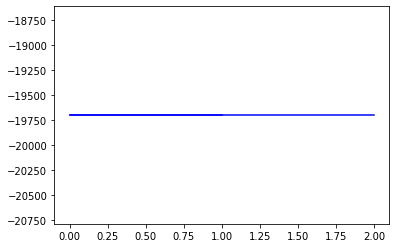

In [31]:
import sys
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 10


# A2C(Advantage Actor-Critic) agent for the Cartpole
class A2CAgent:
    def __init__(self, state_size, action_size):
        
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.actor_lr = 0.0001
        self.critic_lr = 0.0005

        # create model for policy network
        self.actor = self.build_actor()
        self.critic = self.build_critic()

        #if self.load_model:
        #    self.actor.load_weights("./save_model/cartpole_actor.h5")
        #    self.critic.load_weights("./save_model/cartpole_critic.h5")

    # approximate policy and value using Neural Network
    # actor: state is input and probability of each action is output of model
    def build_actor(self):
        actor = Sequential()
        actor.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        #actor.add(Dense(12, activation='relu',
        #                kernel_initializer='he_uniform')),
        actor.add(Dense(self.action_size, activation='softmax',
                        kernel_initializer='he_uniform'))
        actor.summary()
        # See note regarding crossentropy in cartpole_reinforce.py
        actor.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=self.actor_lr))
        return actor

    # critic: state is input and value of state is output of model
    def build_critic(self):
        critic = Sequential()
        critic.add(Dense(24, input_dim=self.state_size, activation='relu',
                         kernel_initializer='he_uniform'))
        #critic.add(Dense(12, activation='relu',
        #                 kernel_initializer='he_uniform'))
        critic.add(Dense(self.value_size, activation='linear',
                         kernel_initializer='he_uniform'))
        critic.summary()
        critic.compile(loss="mse", optimizer=Adam(lr=self.critic_lr))
        return critic

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.actor.predict(state, batch_size=1).flatten()
        print(policy)
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # update policy network every episode
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (next_value) - value
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, maximum length of episode is 500
    env = Environment()
    # get size of state and action from environment
    state_size = env.OBSERVATION_SPACE
    action_size = env.ACTION_SPACE

    # make A2C agent
    agent = A2CAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        env.reset()
        state = env.get_state()
        state = np.reshape(state, [1, state_size])
        c = 0
        while not done:
            c += 1
            print('\r', c, end='')
            action = agent.get_action(state)
            next_state, reward, done = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            
            agent.train_model(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                # every episode, plot the play time
                #score = score if score == 500.0 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("cartpole_a2c.png")
                print("episode:", e, "  score:", score)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                #if np.mean(scores[-min(10, len(scores)):]) > -10:
                #    break

        # save the model
        #if e % 25 == 0:
        #    agent.actor.save_weights("./save_model/cartpole_actor2.h5")
        #    agent.critic.save_weights("./save_model/cartpole_critic2.h5")

In [20]:
df[165:167]

,Date,Open,High,Low,Close,Adj Close,Volume
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
166,1981-08-11,0.441964,0.441964,0.4375,0.4375,0.347471,17864000.0
